# Load and execute the model

In [4]:
graphs = [
    {
        'trial':'B4',
        'content': 'OD',
        'experimental_data': True
    }
]

mscomfit.zip
mscomfit.zip
The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the ecoli measurements.
The ['B2', 'B12', 'G2', 'G12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12'] trials were dropped from the pf measurements.
The ['B2', 'B3', 'B12', 'G12'] trials were removed from the pf measurements, with their deviation ov

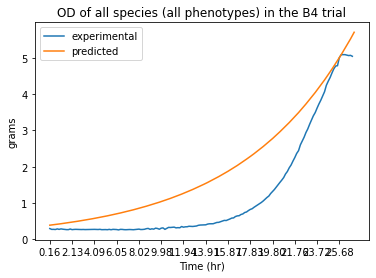

In [6]:
from datetime import datetime
%run mscommfitting.py
mscommfit = MSCommFitting()
mscommfit.load_data(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'RFP_pf-ec_4-29-22.txt':'ecoli', 'GFP_pf-ec_4-29-22.txt':'pf', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           species_abundance_path = 'species_abundances.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00136': {'B':0, 'C': 0, 'D': 1, 'E': 1, 'F': 4, 'G': 4},
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'D', 'E', 'F']}, # 'wells': ['C2', 'G3', 'C12']},  # 'columns': [6,7,8,9,10,11,12]},
                           # ignore_timesteps = [x for x in range(20,167)],
                           zip_path='mscomfit.zip'
                   )
print(datetime.today())
mscommfit.define_problem(parameters={
    'v':0.1,
    'cvmin': 100,
    'bcv': 100,
    'diffpos': 100,
    'diffneg': 100
    }, zip_name='simple_full_community.zip')
print(datetime.today())
%time mscommfit.compute(graphs, zip_name='simple_full_community.zip')
print('growth:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')
print(datetime.today())

# Change the parameters

Done loading the JSON: 0.16171875 min
Done exporting the model: 0.9856770833333334 min
Done loading the model: 3.76875 min
simple_full_community.zip
{'trial': 'B4', 'content': 'OD', 'experimental_data': True, 'phenotype': '*', 'species': '*'}
pred b_ecoli_malt
pred b_ecoli_acetate
pred b_pf_acetate
pred b_pf_4HB
pred b_ecoli_stationary
pred b_pf_stationary
exp
The solution is optimal.
CPU times: total: 7min 50s
Wall time: 7min 50s
growth: 0.1 objective value: 211240.1569319003 




2022-07-15 21:00:51.539690


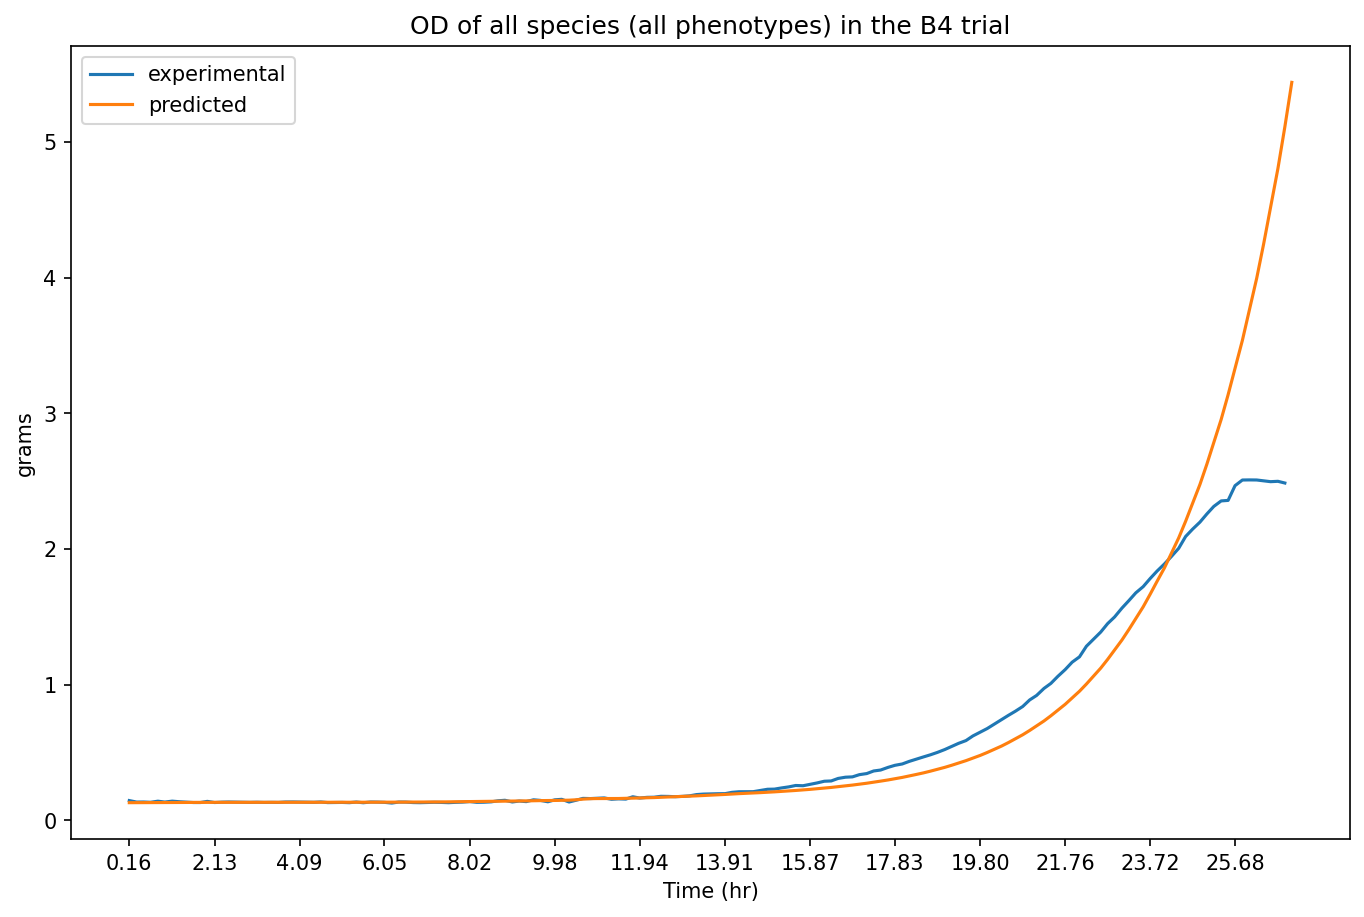

In [9]:
mscommfit.change_parameters(vmax=-.4, zip_name='simple_full_community_edited.zip')  # The Vmax argument can be either a number or a dictionary that is organized by ["time"]["trial"], just as the naming scheme of the variables and constraints
%time mscommfit.compute(graphs, 'simple_full_community_edited.zip')
print('growth:', mscommfit.parameters['v'], 'objective value:', mscommfit.problem.objective.value, '\n\n\n\n')
print(datetime.today())